# E-Commerce Customer satisfaction analysis (NLP)

## Objectives

For in-depth customer satisfaction analysis, I employ topic modeling and wordcloud techniques on customer reviews. This enables a comprehensive understanding of their purchase feedback, highlighting their concerns and areas of dissatisfaction.

## PART 1. Topic Modeling

Identify common concerns among customers by employing Topic modeling.

In [2]:
import pandas as pd

## Import review data
rv = pd.read_csv("/Users/wenzhishan/Desktop/olist analysis/olist_order_reviews_dataset.csv")
rv.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [3]:
import re 
from sklearn import feature_extraction
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from googletrans import Translator
from wordcloud import WordCloud

## Prepocessing reviews
def preprocess(text):
  text = text.lower() #lowercase
  text = re.sub(r'[^\w\s]', '', text) #remove punctuations
  text = re.sub(r'\d+', '', text) #remove numbers
  text = " ".join(text.split()) #strip whitespace
  text = text.split()
  text = [x for x in text if x not in ["do", "nan", "producto","produto", "não", "foi", "e","é", "o", "que", "comprei"]] #remove task specific stopwords
  text = " ".join(text)
  lemmatizer = WordNetLemmatizer()
  text = [lemmatizer.lemmatize(word) for word in text.split()]  #lemmatization
  text = " ".join(text)
  return text


rv['review_processed'] = rv['review_comment_message'].apply(lambda x: preprocess(str(x)))
rv['review_processed']=rv['review_processed'].apply(lambda x:x.split())

In [6]:
## Inspect the dataset with added columns "review_processed"
rv

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_processed
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,[]
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,[]
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,[]
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,"[recebi, bem, ante, prazo, estipulado]"
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,"[parabéns, lojas, lannister, adorei, comprar, ..."
...,...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30,[]
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42,[]
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,"[excelente, mochila, entrega, super, rápida, s..."
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13,[]


In [7]:
from gensim import corpora
dictionary = corpora.Dictionary(rv['review_processed'])

# Dictionary.filter_extremes(keep_n=5000) - keep the top 5000 most frequently mentioned words in the dictionary
rv['review_ids']=rv['review_processed'].apply(lambda x:dictionary.doc2bow(x))
from gensim import models
num_topics=3
ldamodel = models.ldamodel.LdaModel(rv['review_ids'], num_topics = 5, id2word=dictionary, passes=1, random_state=100)


topics = ldamodel.print_topics(num_words=5)
for i in range(num_topics):
    print(topics[i])

(0, '0.112*"tudo" + 0.046*"certo" + 0.035*"ok" + 0.031*"otimo" + 0.027*"achei"')
(1, '0.055*"a" + 0.044*"de" + 0.031*"veio" + 0.028*"com" + 0.023*"um"')
(2, '0.088*"prazo" + 0.059*"ante" + 0.053*"entrega" + 0.043*"chegou" + 0.039*"recomendo"')


Translation:

    (0, '0.112*"everything" + 0.046*"correct" + 0.035*"ok" + 0.031*"excellent" + 0.027*"found"')
    (1, '0.055*"a" + 0.044*"of" + 0.031*"came" + 0.028*"with" + 0.023*"one"')
    (2, '0.088*"deadline" + 0.059*"before" + 0.053*"delivery" + 0.043*"arrived" + 0.039*"recommend"')

Overall, customers were satisfied with the entire purchase experience, and particularly valuing item accuracy and dependable delivery.

## WordCloud

Create distinct word clouds for positive and negative customer reviews using WordCloud, revealing the most frequently used words in each group to understand customer touchpoints and pain points.

### Satisfied Reviews

In [10]:
## Satisfied Review
import matplotlib.pyplot as plt
satisfied_score = [4, 5]
rv_satisfied = rv[rv["review_score"].isin(satisfied_score)]
rv_satisfied.shape

(76470, 9)

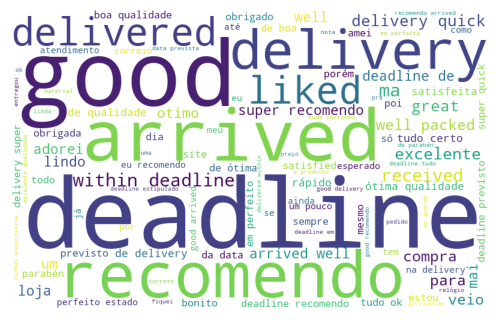

In [19]:
PositiveFb = [' '.join(review) for review in rv_satisfied['review_processed']]
PositiveFb = ' '.join(PositiveFb)

## Translate most frequently appeared words
replacement_dict = {
    "chegou": "arrived",
    "ante": "before",
    "prazo": "deadline",
    "muito": "very",
    "bom" : "good",
    "entregue": "delivered",
    "entrega": "delivery",
    "dentro": "within",
    "embalado": "packed",
    "bem": "well",
    "recebi": "received",
    "gostei":"liked",
    "rápida": "quick",
    "ótimo": "great",
    "satisfeito": "satisfied"
}

PositiveFb_translated = PositiveFb
for old_word, new_word in replacement_dict.items():
    PositiveFb_translated = PositiveFb_translated.replace(old_word, new_word)

    
## Create wordcloud
wordcloud_p = WordCloud(width=800, height=500, background_color='white',
                      min_font_size=10).generate(PositiveFb_translated)

# Display the wordcloud
plt.figure(figsize=(5, 3), facecolor=None)
plt.imshow(wordcloud_p)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

Most satisfied customers highlighted the reliable delivery in their reviews.

In [16]:
## Export wordcloud
wordcloud_p.to_file("Positive_Wordcloud.png")

### Dissatisfied Reviews

In [17]:
## Dissatisfied review
dissatisfied_score = [1,2,3]
rv_dissatisfied = rv[rv["review_score"].isin(dissatisfied_score) & rv['review_processed'].notna()]
rv_dissatisfied.shape

(22754, 9)

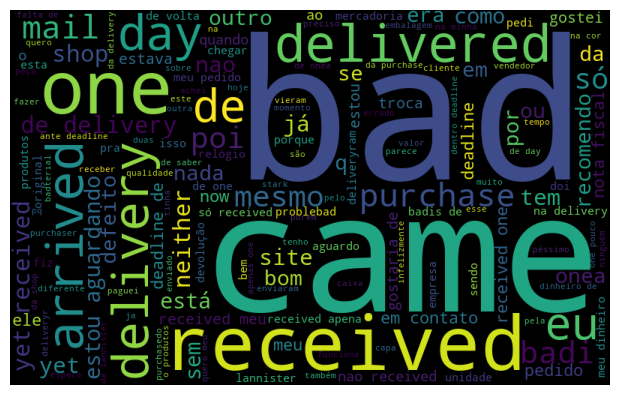

In [20]:
NegativeFb = [' '.join(review) for review in rv_dissatisfied['review_processed']]
NegativeFb = ' '.join(NegativeFb)

## Translate most frequently appeared words
replacement_dict = {
    "chegou": "arrived",
    "até": "until",
    "prazo": "deadline",
    "porém": "however",
    "nem" :  "neither",
    "um": "one",
    "entregue": "delivered",
    "entrega": "delivery",
    "embalado": "packed",
    "para": "to",
    "recebi": "received",
    "ma": "bad",
    "ainda": "yet",
    "veio": "came",
    "correio": "mail",
    "agora": "now",
    "compra": "purchase",
    "dia": "day",
    "loja": "shop"
}

NegativeFb_translated = NegativeFb
for old_word, new_word in replacement_dict.items():
    NegativeFb_translated = NegativeFb_translated.replace(old_word, new_word)

## Create wordcloud
wordcloud_n = WordCloud(width=800, height=500, background_color='black',
                      min_font_size=10).generate(NegativeFb_translated)

# Display the wordcloud
plt.figure(figsize=(6, 4), facecolor=None)
plt.imshow(wordcloud_n)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

Customers with negative ratings also mentioned delivery issues.

In [21]:
## Export wordcloud
wordcloud_n.to_file("Negative_Wordcloud.png")

## Conclusion

Delivery stands out as a significant concern throughout the purchasing process, indicating the need for Olist to conduct comprehensive shipment analysis to unearth underlying issues. Further monitoring is crucial to ensure on-time and accurate item arrivals.